In [102]:
from pathlib import Path
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from unidecode import unidecode
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
def load_corpus(filename):
    corpus = Path(filename).read_text(encoding="utf8")
    return corpus

In [3]:
def load_corpora(filelist,author):
    files = []
    for file in filelist:
        location = "Corpora/train/"+file
        corpus = load_corpus(location)
        files.append(corpus)
    df = pd.DataFrame(files, columns=['Text'])
    df['Author'] = pd.Series([author for x in range(len(df.index))], index=df.index)
    return df

In [4]:
train_set_almada = [
    'AlmadaNegreiros/pg22615.txt',
    'AlmadaNegreiros/pg22730.txt',
    'AlmadaNegreiros/pg22801.txt',
    'AlmadaNegreiros/pg22802.txt',
    'AlmadaNegreiros/pg22969.txt',
    'AlmadaNegreiros/pg23133.txt',
    'AlmadaNegreiros/pg23620.txt',
    'AlmadaNegreiros/pg23879.txt',
    'AlmadaNegreiros/pg23961.txt'
]

In [5]:
corpora_almada = load_corpora(train_set_almada, 'Almada Negreiros')
corpora_almada.shape

(9, 2)

In [6]:
train_set_camilo = [
    'CamiloCasteloBranco/24691-0.txt',
    'CamiloCasteloBranco/34756-0.txt',
    'CamiloCasteloBranco/pg16425.txt',
    'CamiloCasteloBranco/pg17927.txt',
    'CamiloCasteloBranco/pg19375.txt',
    'CamiloCasteloBranco/pg21406.txt',
    'CamiloCasteloBranco/pg23203.txt',
    'CamiloCasteloBranco/pg23345.txt',
    'CamiloCasteloBranco/pg23346.txt',
    'CamiloCasteloBranco/pg24339.txt',
    'CamiloCasteloBranco/pg25844.txt',
    'CamiloCasteloBranco/pg26017.txt',
    'CamiloCasteloBranco/pg26103.txt',
    'CamiloCasteloBranco/pg26110.txt',
    'CamiloCasteloBranco/pg26988.txt',
    'CamiloCasteloBranco/pg27364.txt',
    'CamiloCasteloBranco/pg27541.txt',
    'CamiloCasteloBranco/pg28310.txt',
    'CamiloCasteloBranco/pg31694.txt',
    'CamiloCasteloBranco/pg33788.txt',
]

corpora_camilo = load_corpora(train_set_camilo, 'Camilo Castelo Branco')
corpora_camilo.shape

(20, 2)

In [7]:
train_set_eca = [
    'EcaDeQueiros/pg18220.txt',
    'EcaDeQueiros/pg25641.txt',
    'EcaDeQueiros/pg27637.txt',
    'EcaDeQueiros/pg31347.txt',
    'EcaDeQueiros/pg40409.txt'
]

corpora_eca = load_corpora(train_set_eca, 'Eca de Queiros')
corpora_eca.shape

(5, 2)

In [8]:
train_set_rodrigues_santos = [
    'JoseRodriguesSantos/A Filha Do Capitao - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Formula De Deus - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Mao do Diabo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Vida Num Sopro - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/Furia Divina - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Anjo Branco - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Setimo Selo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O ultimo Segredo - Jose Rodrigues dos Santos.txt'
]

corpora_rodrigues_santos = load_corpora(train_set_rodrigues_santos, 'Jose Rodrigues dos Santos')
corpora_rodrigues_santos.shape

(8, 2)

In [9]:
train_set_saramago = [
    'JoseSaramago/A Caverna - Jose Saramago.txt',
    'JoseSaramago/As Intermitencias da Morte - Jose Saramago.txt',
    'JoseSaramago/Caim - Jose Saramago.txt',
    'JoseSaramago/Claraboia - Jose Saramago.txt',
    'JoseSaramago/Ensaio Sobre a Cegueira - Jose Saramago.txt',
    'JoseSaramago/Historia Do Cerco De Lisboa - Jose Saramago.txt',
    'JoseSaramago/Memorial Do Convento - Jose Saramago.txt',
    'JoseSaramago/O Ano Da Morte De Ricardo Reis - Jose Saramago.txt',
    'JoseSaramago/O Conto Da Ilha Desconhecida - Jose Saramago.txt',
    'JoseSaramago/O Homem Duplicado - Jose Saramago.txt',
    'JoseSaramago/Terra Do Pecado - Jose Saramago.txt',
    'JoseSaramago/Viagem Do Elefante - Jose Saramago.txt'
]

corpora_saramago = load_corpora(train_set_saramago, 'Jose Saramago')
corpora_saramago.shape

(12, 2)

In [10]:
train_set_luisa = [
    'LuisaMarquesSilva/ABelaHistoria.txt',
    'LuisaMarquesSilva/acabouSe.txt',
    'LuisaMarquesSilva/Botão.txt',
    'LuisaMarquesSilva/controlz.txt',
    'LuisaMarquesSilva/emedo.txt',
    'LuisaMarquesSilva/Lisboa2050.txt',
    'LuisaMarquesSilva/passeioInferno.txt',
    'LuisaMarquesSilva/rapsodiasemdo.txt',
    'LuisaMarquesSilva/UltimaHistoria.txt'
]

corpora_luisa = load_corpora(train_set_luisa, 'Luisa Marques Silva')
corpora_luisa.shape

(9, 2)

In [11]:
corpora = pd.concat([corpora_almada, corpora_camilo, corpora_eca, corpora_rodrigues_santos, corpora_saramago, corpora_luisa]).reset_index(drop = True)
corpora.shape

(63, 2)

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) #chose 5 because this means that the train-test split is approximately 80%-20%
train_test_splits = []

for train_index, test_index in kf.split(corpora):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_test_splits.append((train_index,test_index))
    
train_test_splits

[(array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25,

In [13]:
"""
from unidecode import unidecode

corpora['Text'] = corpora['Text'].apply(lambda text: unidecode(text))

corpora
"""

"\nfrom unidecode import unidecode\n\ncorpora['Text'] = corpora['Text'].apply(lambda text: unidecode(text))\n\ncorpora\n"

In [14]:
"""
char = ''

for text in corpora['Text']:
    characters = list(set(text))
    for c in characters:
        char += c
    #print(list(set(text)))
    
print(list(set(char)))
"""

"\nchar = ''\n\nfor text in corpora['Text']:\n    characters = list(set(text))\n    for c in characters:\n        char += c\n    #print(list(set(text)))\n    \nprint(list(set(char)))\n"

In [15]:
"""
rep = {'\n':' ',
       '#':'',
       '+':'',
       '-':' ',
       '_':'',
       '<':'',
       '>':'',
       '=':'',
       '*':'',
       '\\':'',
       '|':'',
       '~':'',
       '[':'',
       ']':'',
       "'":' ',
       '"':'',
       '  ':' '
      }

for i,j in rep.items():
    corpora['Text'] = corpora['Text'].apply(lambda text: text.replace(i,j))

#print(corpora.loc[0,'Text'])

corpora
"""

'\nrep = {\'\n\':\' \',\n       \'#\':\'\',\n       \'+\':\'\',\n       \'-\':\' \',\n       \'_\':\'\',\n       \'<\':\'\',\n       \'>\':\'\',\n       \'=\':\'\',\n       \'*\':\'\',\n       \'\\\':\'\',\n       \'|\':\'\',\n       \'~\':\'\',\n       \'[\':\'\',\n       \']\':\'\',\n       "\'":\' \',\n       \'"\':\'\',\n       \'  \':\' \'\n      }\n\nfor i,j in rep.items():\n    corpora[\'Text\'] = corpora[\'Text\'].apply(lambda text: text.replace(i,j))\n\n#print(corpora.loc[0,\'Text\'])\n\ncorpora\n'

In [16]:
#print(corpora['Text'][0])

In [17]:
def preprocessing(dataframe):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        
        #Remove specific punctuations
        #rep = {'\n':' ','#':'','+':'','-':' ','_':'','<':'','>':'','=':'','*':'','\\':'','|':'','~':'','[':'',']':'',
               #"'":' ','"':'','  ':' '}
        #remove punctuation 
        #text = re.sub('[^a-zA-Z]', ' ', text) 

        #for i,j in rep.items():
            #text = text.replace(i,j)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #print(text)
        #text_2 = [lem.lemmatize(word) for word in text if n                                                                                                                                                              ot word in stop_words_pt] 
        text = " ".join(text)
        
        #text_2 = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #text = " ".join(text_2)
        #print(text)
        processed_corpus.append(text)
    return processed_corpus

In [18]:
cleaned_corpora = preprocessing(corpora)

In [19]:
corpora['Clean Text'] = pd.Series(cleaned_corpora, index = corpora.index)
corpora

,Text,Author,Clean Text
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title: scena odio author: jose almada negreiro...
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title: jardim pierrette author: jose almada ne...
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title: invencao dia claro author: jose almada ...
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title: litoral amadeo souza cardozo author: jo...
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao +amadeo souza cardoso+ liga naval li...
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,*jose almada-negreiros* *k4 quadrado azul* aca...
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,"*""orpheu""* revista trimestral literatura portu..."
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,+a engomadeira+ novela vulgar lisboeta +engoma...
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,+manifesto+ +anti-dantas+ extenso jose almada-...
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d'uma bestialidade inglez...


In [20]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

corpora['count_punct'] = corpora['Clean Text'].apply(lambda s: count(s, string.punctuation))

accumulate = lambda l1,l2: [x for x in l1 if x in l2]

corpora['acc_punct_list'] = corpora['Clean Text'].apply(lambda s: accumulate(s, string.punctuation))

corpora

,Text,Author,Clean Text,count_punct,acc_punct_list
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title: scena odio author: jose almada negreiro...,510,"[:, :, :, ,, [, #, ], :, _, ., _, -, !, -, ,, ..."
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title: jardim pierrette author: jose almada ne...,54,"[:, :, :, ,, [, #, ], :, +, +, ', ., ,, ,, :, ..."
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title: invencao dia claro author: jose almada ...,723,"[:, :, :, ,, [, #, ], :, ,, ., -, "", "", ,, ., ..."
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title: litoral amadeo souza cardozo author: jo...,62,"[:, :, :, :, ,, [, #, ], :, ?, ', ', +, +, ', ..."
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao +amadeo souza cardoso+ liga naval li...,104,"[+, +, ., ., ^, ., ., (, ), ., ., -, -, ., -, ..."
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,*jose almada-negreiros* *k4 quadrado azul* aca...,516,"[*, -, *, *, *, -, *, *, *, *, *, *, *, -, *, ..."
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,"*""orpheu""* revista trimestral literatura portu...",5609,"[*, "", "", *, :, ,, ., ^, :, _, _, -, -, ,, -, ..."
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,+a engomadeira+ novela vulgar lisboeta +engoma...,1781,"[+, +, +, +, +, -, ,, :, +, +, +, :, _, +, +, ..."
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,+manifesto+ +anti-dantas+ extenso jose almada-...,532,"[+, +, +, -, +, -, ', ., -, ,, ., ,, ,, ., ,, ..."
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d'uma bestialidade inglez...,2333,"[', ., &, ,, ,, ., _, _, ., ,, ,, ,, ', ., ,, ..."


In [21]:
corpora

,Text,Author,Clean Text,count_punct,acc_punct_list
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title: scena odio author: jose almada negreiro...,510,"[:, :, :, ,, [, #, ], :, _, ., _, -, !, -, ,, ..."
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title: jardim pierrette author: jose almada ne...,54,"[:, :, :, ,, [, #, ], :, +, +, ', ., ,, ,, :, ..."
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title: invencao dia claro author: jose almada ...,723,"[:, :, :, ,, [, #, ], :, ,, ., -, "", "", ,, ., ..."
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title: litoral amadeo souza cardozo author: jo...,62,"[:, :, :, :, ,, [, #, ], :, ?, ', ', +, +, ', ..."
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao +amadeo souza cardoso+ liga naval li...,104,"[+, +, ., ., ^, ., ., (, ), ., ., -, -, ., -, ..."
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,*jose almada-negreiros* *k4 quadrado azul* aca...,516,"[*, -, *, *, *, -, *, *, *, *, *, *, *, -, *, ..."
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,"*""orpheu""* revista trimestral literatura portu...",5609,"[*, "", "", *, :, ,, ., ^, :, _, _, -, -, ,, -, ..."
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,+a engomadeira+ novela vulgar lisboeta +engoma...,1781,"[+, +, +, +, +, -, ,, :, +, +, +, :, _, +, +, ..."
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,+manifesto+ +anti-dantas+ extenso jose almada-...,532,"[+, +, +, -, +, -, ', ., -, ,, ., ,, ,, ., ,, ..."
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d'uma bestialidade inglez...,2333,"[', ., &, ,, ,, ., _, _, ., ,, ,, ,, ', ., ,, ..."


In [22]:
import collections as ct

corpora['acc_punct_dict'] = corpora['acc_punct_list'].apply(lambda s: {k:v for k, v in ct.Counter(s).items() if k in string.punctuation})

In [23]:
df_punct = corpora['acc_punct_dict'].apply(pd.Series)

In [24]:
corpora = pd.concat([corpora, df_punct], axis = 1)
corpora = corpora.fillna(0)

In [25]:
corpora = corpora.drop(['acc_punct_list', 'acc_punct_dict'], axis = 1)

In [26]:
def preprocessing2(dataframe):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        
        #Remove specific punctuations
        #rep = {'\n':' ','#':'','+':'','-':' ','_':'','<':'','>':'','=':'','*':'','\\':'','|':'','~':'','[':'',']':'',
               #"'":' ','"':'','  ':' '}
        #remove punctuation 
        text = re.sub('[^a-zA-Z]', ' ', text) 

        #for i,j in rep.items():
            #text = text.replace(i,j)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #print(text)
        #text_2 = [lem.lemmatize(word) for word in text if n                                                                                                                                                              ot word in stop_words_pt] 
        text = " ".join(text)
        
        #text_2 = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #text = " ".join(text_2)
        #print(text)
        processed_corpus.append(text)
    return processed_corpus

In [27]:
cleaned_corpora = preprocessing2(corpora)

In [28]:
corpora['Clean Text'] = pd.Series(cleaned_corpora, index = corpora.index)
corpora

,Text,Author,Clean Text,count_punct,:,",",[,#,],_,...,=,$,/,{,},%,\,|,~,@
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,510,7.0,118.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,54,5.0,7.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,723,29.0,144.0,2.0,1.0,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,62,5.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,104,1.0,29.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,jose almada negreiros k quadrado azul acaba ap...,516,4.0,87.0,1.0,0.0,1.0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,orpheu revista trimestral literatura portugal ...,5609,29.0,1138.0,0.0,0.0,0.0,188.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,engomadeira novela vulgar lisboeta engomadeira...,1781,31.0,336.0,0.0,0.0,0.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,manifesto anti dantas extenso jose almada negr...,532,9.0,179.0,7.0,0.0,7.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d bestialidade ingleza ex...,2333,36.0,972.0,4.0,0.0,4.0,250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
word_count = corpora['Clean Text'].apply(lambda x: len(str(x).split(" ")))
word_count_2 = corpora['Text'].apply(lambda x: len(str(x).split(" ")))
corpora['word_count_text'] = word_count_2
corpora['word_count_clean'] = word_count
corpora.head()

,Text,Author,Clean Text,count_punct,:,",",[,#,],_,...,/,{,},%,\,|,~,@,word_count_text,word_count_clean
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,510,7.0,118.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1456,1139
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,54,5.0,7.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280,203
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,723,29.0,144.0,2.0,1.0,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6212,3439
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,62,5.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1225,476
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,104,1.0,29.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,521,354


In [30]:
corpora.groupby(['Author']).sum()

,count_punct,:,",",[,#,],_,.,-,!,...,/,{,},%,\,|,~,@,word_count_text,word_count_clean
Author,,,,,,,,,,,,,,,,,,,,,
Almada Negreiros,9891,120.0,2039.0,15.0,4.0,15.0,334.0,3587.0,1748.0,621.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43610,27887
Camilo Castelo Branco,192141,2998.0,59534.0,220.0,4.0,220.0,4471.0,55845.0,43557.0,5655.0,...,2.0,35.0,44.0,4.0,6.0,22.0,0.0,0.0,749872,454886
Eca de Queiros,130931,3159.0,52322.0,20.0,0.0,20.0,5767.0,31519.0,18975.0,5323.0,...,0.0,38.0,41.0,0.0,0.0,0.0,2.0,0.0,438367,272083
Jose Rodrigues dos Santos,262657,937.0,71790.0,1.0,12.0,1.0,1.0,74452.0,23129.0,5357.0,...,78.0,0.0,23.0,7.0,11.0,16.0,1.0,3.0,1131971,668358
Jose Saramago,195897,1520.0,135421.0,4.0,0.0,8.0,9.0,29335.0,26067.0,1392.0,...,32.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,1006571,583250
Luisa Marques Silva,8905,557.0,2982.0,0.0,2.0,0.0,0.0,3238.0,863.0,219.0,...,88.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,41214,24114


In [31]:
corpora.word_count_clean.describe()

count        63.000000
mean      32231.396825
std       31577.716825
min         203.000000
25%        3599.500000
50%       28211.000000
75%       45676.500000
max      131684.000000
Name: word_count_clean, dtype: float64

In [32]:
all_words = ' '.join(corpora['Clean Text']).split()

In [33]:
# Count all words
freq = pd.Series(all_words).value_counts()

In [34]:
freq[:25]

nao       52050
d         12481
ja         9952
disse      7494
la         7176
ser        7060
ainda      6639
ha         5941
bem        5716
dia        5661
onde       5642
mao        5556
so         5418
ate        5225
sobre      5090
porque     5011
assim      4912
olhos      4908
n          4875
toda       4868
tempo      4857
aqui       4824
tudo       4785
agora      4730
homem      4713
dtype: int64

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mafalda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

From the top 30 most frequent words count the number of stopwords. What's the percentage?

In [36]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("portuguese"))
stop_words = []
for word in stopwords:
    word = unidecode(word)
    stop_words.append(word)
count = 0
for word in freq.index[:30]:
    if word in stop_words:
        count += 1
count

5

In [37]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
count = 0
for word in freq.index[:30]:
    if word in stopwords:
        count += 1
count

2

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,3) # all inclusive from {1,2,3}, if only bigrams use (2,2)
)

In [39]:
X = cv.fit_transform(corpora["Clean Text"])

In [40]:
list(cv.vocabulary_.keys())[:10]

['scena',
 'odio',
 'author',
 'almada',
 'portuguese',
 'alvaro',
 'campos',
 'poema',
 'escripto',
 'noites']

In [41]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [42]:
top_df = get_top_n_grams(cleaned_corpora, top_k=20, n=1)

In [43]:
top_df.head(10)

,Ngram,Freq
0,nao,52050
1,ja,9952
2,disse,7494
3,la,7176
4,ser,7060
5,ainda,6639
6,ha,5941
7,bem,5716
8,dia,5661
9,onde,5642


In [44]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

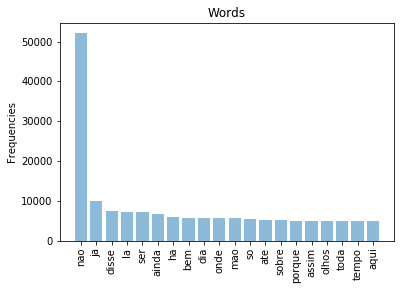

In [45]:
plot_frequencies(top_df)

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [47]:
# get feature names
feature_names = cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = cleaned_corpora[10]
 
#generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [48]:
tf_idf_vector.toarray()

array([[0.      , 0.      , 0.001876, ..., 0.      , 0.      , 0.      ]])

In [49]:
def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

In [50]:
extract_feature_scores(feature_names, tf_idf_vector.toarray())[:10]

[('venceslau', 0.6069201384643949),
 ('julia', 0.40976503689400834),
 ('eduardo', 0.29025123699140865),
 ('elle', 0.19082193013927964),
 ('taveira', 0.18105505057347132),
 ('commendador', 0.1696980948404514),
 ('anna', 0.15197905648445792),
 ('venceslau taveira', 0.14802930206448653),
 ('snr', 0.14632827569568585),
 ('vaz', 0.1359735524644437)]

In [51]:
doc = cleaned_corpora[10]

In [52]:
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))
tf_idf_vector

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 4206 stored elements in Compressed Sparse Row format>

In [53]:
corpora

,Text,Author,Clean Text,count_punct,:,",",[,#,],_,...,/,{,},%,\,|,~,@,word_count_text,word_count_clean
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,510,7.0,118.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1456,1139
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,54,5.0,7.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280,203
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,723,29.0,144.0,2.0,1.0,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6212,3439
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,62,5.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1225,476
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,104,1.0,29.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,521,354
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,jose almada negreiros k quadrado azul acaba ap...,516,4.0,87.0,1.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5876,3912
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,orpheu revista trimestral literatura portugal ...,5609,29.0,1138.0,0.0,0.0,0.0,188.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14191,9526
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,engomadeira novela vulgar lisboeta engomadeira...,1781,31.0,336.0,0.0,0.0,0.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11408,7217
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,manifesto anti dantas extenso jose almada negr...,532,9.0,179.0,7.0,0.0,7.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2441,1621
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d bestialidade ingleza ex...,2333,36.0,972.0,4.0,0.0,4.0,250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10154,5925


In [54]:
corpora['Word List'] = corpora['Clean Text']

for i in corpora.index:
    mystr = corpora['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora['Word List'][i] = wordList
    
corpora

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Text,Author,Clean Text,count_punct,:,",",[,#,],_,...,{,},%,\,|,~,@,word_count_text,word_count_clean,Word List
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,510,7.0,118.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1456,1139,"[title, scena, odio, author, jose, almada, neg..."
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,54,5.0,7.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280,203,"[title, jardim, pierrette, author, jose, almad..."
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,723,29.0,144.0,2.0,1.0,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6212,3439,"[title, invencao, dia, claro, author, jose, al..."
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,62,5.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1225,476,"[title, litoral, amadeo, souza, cardozo, autho..."
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,104,1.0,29.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,521,354,"[exposicao, amadeo, souza, cardoso, liga, nava..."
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,jose almada negreiros k quadrado azul acaba ap...,516,4.0,87.0,1.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5876,3912,"[jose, almada, negreiros, k, quadrado, azul, a..."
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,orpheu revista trimestral literatura portugal ...,5609,29.0,1138.0,0.0,0.0,0.0,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14191,9526,"[orpheu, revista, trimestral, literatura, port..."
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,engomadeira novela vulgar lisboeta engomadeira...,1781,31.0,336.0,0.0,0.0,0.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11408,7217,"[engomadeira, novela, vulgar, lisboeta, engoma..."
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,manifesto anti dantas extenso jose almada negr...,532,9.0,179.0,7.0,0.0,7.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2441,1621,"[manifesto, anti, dantas, extenso, jose, almad..."
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d bestialidade ingleza ex...,2333,36.0,972.0,4.0,0.0,4.0,250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10154,5925,"[vinho, porto, processo, d, bestialidade, ingl..."


In [57]:
# rethink this later
def knn(corpora, textList, k):
    textList = re.sub("[^\w]", " ",  text).split()
    
    similarity = pd.Series(index = corpora.index)
    
    for i in corpora.index:
        sim = 0
        for word in textList:
            if word in corpora['Word List'][i]:
                sim += 1
            
        similarity[i] = sim
        
    similarity.sort_values(ascending=False, inplace=True)
    
    similarity = similarity[:k]
    
    classification = []
    
    for i in similarity.index:
        author = corpora['Author'][i]
        classification.append(author)
        
    knn = pd.DataFrame({'Similarity':similarity.values,'Author':classification})
    knn.set_index(similarity.index, inplace=True)
    
    #print(knn)
    
    a = knn['Author'].mode()
    #print(a)
    
    if a.shape[0]>1:
        #print(knn.loc[knn['Author'].isin(a.values)].reset_index())
        a = knn.loc[knn['Author'].isin(a.values)].reset_index().loc[0,['Author']]
        
    return a

In [58]:
c = corpora[1:]
text = corpora['Word List'][0]
knn(c, text, 10)

Author    Eca de Queiros
Name: 0, dtype: object

In [138]:
train_X = corpora['Clean Text'].drop(index=[30,31])
train_Y = corpora['Author'].drop(index=[30,31])

test_X = corpora['Clean Text'][30:32]
test_Y = corpora['Author'][30:32]

In [139]:
Encoder = LabelEncoder()
train_Y = Encoder.fit_transform(train_Y)
test_Y = Encoder.fit_transform(test_Y)

In [140]:
train_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [141]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpora['Clean Text'])

train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)
print(Tfidf_vect.vocabulary_)

{'scena': 4243, 'odio': 3275, 'jose': 2618, 'portuguese': 3691, 'alvaro': 218, 'campos': 702, 'poema': 3652, 'escripto': 1777, 'durante': 1596, 'tres': 4710, 'dia': 1467, 'noites': 3211, 'durou': 1599, 'revolucao': 4109, 'maio': 2855, 'castigo': 778, 'riso': 4126, 'dentes': 1354, 'inferno': 2480, 'arder': 357, 'cantar': 711, 'vermelho': 4853, 'demonio': 1351, 'genio': 2242, 'mare': 2911, 'alta': 208, 'raiva': 3944, 'sol': 4419, 'vida': 4881, 'vive': 4947, 'la': 2644, 'so': 4399, 'deram': 1363, 'hao': 2325, 'agora': 134, 'quero': 3914, 'poeta': 3655, 'gloria': 2254, 'commum': 992, 'onde': 3312, 'querem': 3905, 'rir': 4122, 'lev': 2718, 'luz': 2829, 'almas': 202, 'jardim': 2596, 'mim': 3017, 'voz': 4989, 'ser': 4329, 'virgem': 4922, 'milagre': 3010, 'doido': 1565, 'abandono': 6, 'mal': 2861, 'ira': 2557, 'avo': 463, 'ainda': 149, 'gemidos': 2237, 'ai': 148, 'eterna': 1901, 'antiga': 286, 'ruinas': 4164, 'azas': 465, 'virtude': 4925, 'mae': 2842, 'angustia': 269, 'freira': 2181, 'sosinha'

In [142]:
print(train_X_Tfidf)

  (0, 4991)	0.027707553612395807
  (0, 4989)	0.07974634165461544
  (0, 4987)	0.06271493546530915
  (0, 4986)	0.03151049237391501
  (0, 4985)	0.027707553612395807
  (0, 4982)	0.02585446958375201
  (0, 4975)	0.027707553612395807
  (0, 4957)	0.07253445352472251
  (0, 4952)	0.03987317082730772
  (0, 4947)	0.046792664382578855
  (0, 4946)	0.06794337710478253
  (0, 4925)	0.054451319203212264
  (0, 4922)	0.06067504480704326
  (0, 4921)	0.03276731485653077
  (0, 4917)	0.020576220671242346
  (0, 4910)	0.02458249153697217
  (0, 4886)	0.03276731485653077
  (0, 4885)	0.03033752240352163
  (0, 4881)	0.07258571287293282
  (0, 4868)	0.05529725629626173
  (0, 4853)	0.08167697880481839
  (0, 4843)	0.026756617641899197
  (0, 4842)	0.023782897886733503
  (0, 4839)	0.02458249153697217
  (0, 4835)	0.019625284700745732
  :	:
  (60, 145)	0.014881652809950489
  (60, 140)	0.020159233763739265
  (60, 134)	0.10833134946606907
  (60, 129)	0.007596604107098854
  (60, 126)	0.010118253247392406
  (60, 122)	0.0065636

In [143]:
# fit the training dataset on the NB classifier
Naive = MultinomialNB()
Naive.fit(train_X_Tfidf,train_Y)# predict the labels on validation dataset
predictions_NB = Naive.predict(test_X_Tfidf)# Use accuracy_score function to get the accuracy
predictions_NB
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_Y)*100)

Naive Bayes Accuracy Score ->  0.0
